# Homework goals: Training neural networks
- Get comfortable practicing backprop
- Investigate the effect of different optimizers
- Implement different initializers and see their effects on deep networks
- Learn how to implement the components using PyTorch

## Question 1: warmup on a scalar network
We are going to revisit the scalar network we implemented previously and implement backprop for it. Then, we're going to generalize it to a much deeper network so that your implementation can't rely on hardcoding without making yourself miserable.
$$f[x;\phi] = \beta_3 + \omega_3 \cdot \cos \left[\beta_2 + \omega_2 \cdot \exp \left[\beta_1 + \omega_1 \cdot \sin \left[\beta_0 + \omega_0 \cdot x \right] \right] \right]$$
First, what does this function look like for some random values of the parameters? Let's plot it.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        
set_seed(0)

In [ ]:
omega_0 = 1.0
beta_0 = 1.0
omega_1 = 1.0
beta_1 = 1.0
omega_2 = 1.0
beta_2 = 1.0
omega_3 = 1.0
beta_3 = 1.0
# $$f[x;\phi] = \beta_3 + \omega_3 \cdot \cos \left[\beta_2 + \omega_2 \cdot \exp \left[\beta_1 + \omega_1 \cdot \sin \left[\beta_0 + \omega_0 \cdot x] \right] \right] \right]$$
def f(x, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3):
    return beta_3 + omega_3 * np.cos(beta_2 + omega_2 * np.exp(beta_1 + omega_1 * np.sin(beta_0 + omega_0 * x)))

x_range = np.linspace(-3, 3, 1000)
plt.figure()
plt.plot(x_range, f(x_range, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3))

# Lets generate a dataset for this and try to fit it with this function
# Lets just make it some random polynomial
data_size = 256
x_data = np.random.uniform(-3, 3, data_size)
y_data = f(x_data, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3) + np.random.normal(0, 0.1, data_size)
# plot it real quick
plt.figure()
plt.scatter(x_data, y_data)

In [ ]:
class ScalarFunction():
    def __init__(self, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3, learning_rate):
        self.omega_0 = omega_0
        self.beta_0 = beta_0
        self.omega_1 = omega_1
        self.beta_1 = beta_1
        self.omega_2 = omega_2
        self.beta_2 = beta_2
        self.omega_3 = omega_3
        self.beta_3 = beta_3
        self.learning_rate = learning_rate

    # Now lets implement backpropagation
    def compute_gradients(self, x_data, y_data):
        '''Computes and returns an ordered list of the gradients of the loss with respect to each parameter'''
        # TODO: this function should return the gradient values of omega_0, beta_0, etc.
        # Forward pass
        # Backward pass
        return dL_domega_0, dL_dbeta_0, dL_domega_1, dL_dbeta_1, dL_domega_2, dL_dbeta_2, dL_domega_3, dL_dbeta_3

    def apply_gradients(self, dL_domega_0, dL_dbeta_0, dL_domega_1, dL_dbeta_1, dL_domega_2, dL_dbeta_2, dL_domega_3, dL_dbeta_3, learning_rate):
        '''Apply the computed gradients using SGD'''
        # TODO fill this in

    def update(self, x_data, y_data):
        dL_domega_0, dL_dbeta_0, dL_domega_1, dL_dbeta_1, dL_domega_2, dL_dbeta_2, dL_domega_3, dL_dbeta_3 = self.compute_gradients(x_data, y_data)
        self.apply_gradients(dL_domega_0, dL_dbeta_0, dL_domega_1, dL_dbeta_1, dL_domega_2, dL_dbeta_2, dL_domega_3, dL_dbeta_3, learning_rate)
        
    def forward(self, x_data):
        '''return the predictions'''
        # TODO
    
    def loss(self, x_data, y_true):
        '''return the mean loss'''
        # TODO

# Now lets train the model
omega_0 = 0.5
beta_0 = 0.5
omega_1 = 0.5
beta_1 = 0.5
omega_2 = 1.0
beta_2 = 1.0
omega_3 = 1.0
beta_3 = 1.0
learning_rate = 0.01

func = ScalarFunction(omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3, learning_rate)

def plot_and_run(func, num_iters, selection_fn):
    # lets quickly plot what this looks like before it all gets started
    y_pred = func.forward(x_range)
    plt.figure()
    plt.plot(x_range, y_pred)
    plt.scatter(x_data, y_data)
    plt.title('Before training')
    plt.show()

    # Okay now lets run gradient descent and periodically store the loss for plotting later
    losses = []
    for i in range(num_iters):
        func.update(*selection_fn(x_data, y_data))
        losses.append(func.loss(x_data, y_data))
        if i % 100 == 0:
            print(f'Loss at iteration {i}: {losses[-1]}')

    # plot the predictions at the end of training
    y_pred = func.forward(x_range)
    plt.figure()
    plt.plot(x_range, y_pred)
    plt.scatter(x_data, y_data)

    # plot the loss functions
    plt.figure()
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss over iterations')

def selection_fn(x_data, y_data):
    # This function is used to select the data points to use for training
    return x_data, y_data

plot_and_run(func, 1000, selection_fn)

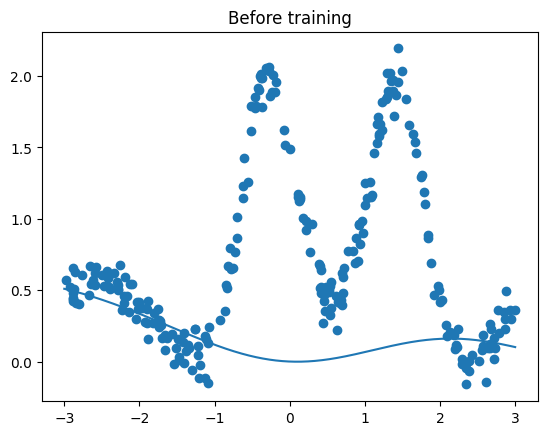
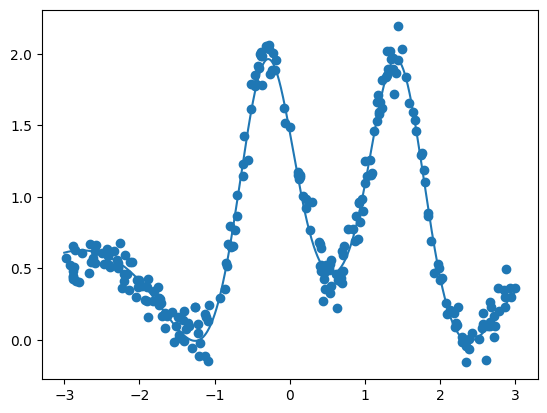
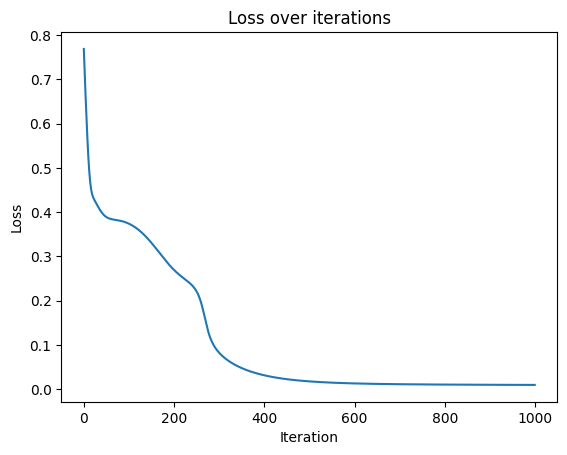

## Now lets see something pretty interesting. Lets try this again but in a setting with different initializations.

This will show you some of the challenges that can show up when we're working with very non-convex functions


In [ ]:
# Lets draw our initializations from a Gaussian distribution
omega_0 = np.random.normal(0, 1)
beta_0 = np.random.normal(0, 1)
omega_1 = np.random.normal(0, 1)
beta_1 = np.random.normal(0, 1)
omega_2 = np.random.normal(0, 1)
beta_2 = np.random.normal(0, 1)
omega_3 = np.random.normal(0, 1)
beta_3 = np.random.normal(0, 1)
learning_rate = 0.01
func = ScalarFunction(omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3, learning_rate)
plot_and_run(func, 1000, selection_fn)

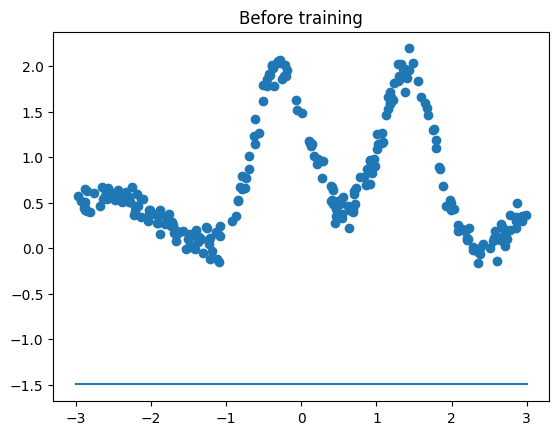
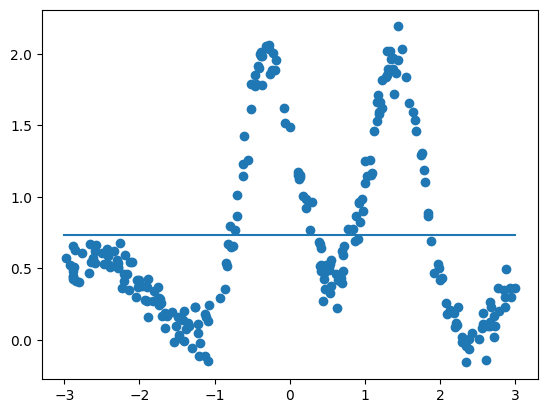
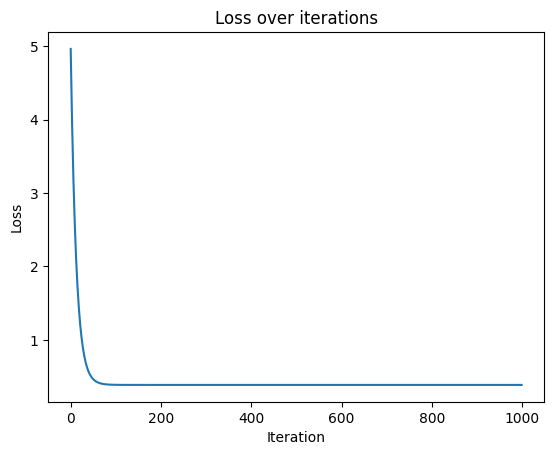

## 1.2 Nothing to do here, just interesting.
So what's happening here? Well, it looks like we're trapped in a local minimum. One way to see this is to plot the loss as a function of the parameters. This is hard to visualize in higher dimension, so let's just plot it in 2D for one set of parameters. We'll take the function we just constructed and sweep the value of $\omega_0$ and see how it changes. 

In [ ]:
omega_0 = np.random.normal(0, 1)
beta_0 = np.random.normal(0, 1)
omega_1 = np.random.normal(0, 1)
beta_1 = np.random.normal(0, 1)
omega_2 = np.random.normal(0, 1)
beta_2 = np.random.normal(0, 1)
omega_3 = np.random.normal(0, 1)
beta_3 = np.random.normal(0, 1)
learning_rate = 0.01
func = ScalarFunction(omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3, learning_rate)

omega_0_range = np.linspace(-5, 5, 100)
losses = []
original_value = func.omega_0
for val in omega_0_range:
    func.omega_0 = val
    losses.append(func.loss(x_data, y_data))
func.omega_0 = original_value
plt.figure()
plt.plot(omega_0_range, losses)
plt.xlabel('omega_0')
plt.ylabel('Loss')
plt.title('Loss as a function of omega_0')

# Lets try the same thing for omega 1
original_value = func.omega_1
losses = []
for val in omega_0_range:
    func.omega_1 = val
    losses.append(func.loss(x_data, y_data))
func.omega_1 = original_value
plt.figure()
plt.plot(omega_0_range, losses)
plt.xlabel('omega_0')
plt.ylabel('Loss')
plt.title('Loss as a function of omega_0')


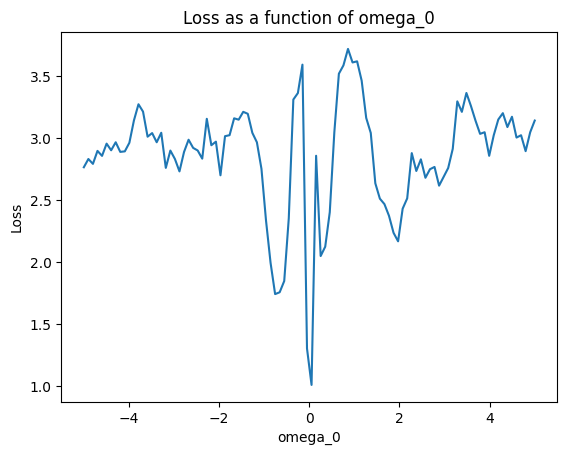
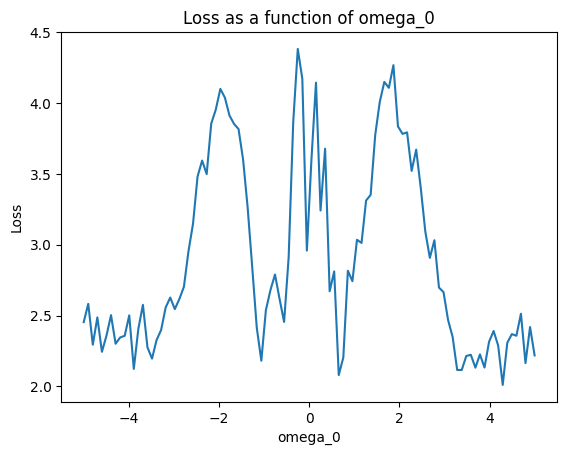

So if we just follow the gradient, we're almost certainly going to get trapped in a local minimum. The point of this is just to recognize that there are going to be non-convex functions that are pretty hard to optimize / have tons of local minima! We're fortunate that it appears that neural networks, despite also likely having tons of local minima, appear to empirically perform well despite falling into them.

In [ ]:
# Implement a selection function that iterates over the data points and implements stochastic gradient descent. It should have a few features
# 1. It should have a parameter that controls the number of data points to use
# 2. It should sequentially pass over the data points. Once it reaches the end of the data, it should shuffle the data and start over
# a few suggestions for how to do this
# 1. You can store the current index in the selection function and increment it each time the function is called
# 2. You can maintain an array of indices that you shuffle each time you reach the end of the data
# 3. One useful thing to know, in python if a class has a __call__ method, you can call the class like a function. We use this to override the () operator so that when the training loop calls the selection function
# Note that we've made the dataset divisible by powers of 2 to make it so that
# you can keep easy count of how far along the dataset you are


class SelectionFunction():
    def __init__(self, batch_size, data_size):
        self.batch_size = batch_size
        self.indices = np.arange(data_size)
        self.current_index = 0
        
    def __call__(self, x_data, y_data):
        # TODO
    
sgd_selection_func = SelectionFunction(32, x_data.shape[0])
learning_rate = 0.01
func = ScalarFunction(omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3, learning_rate)
plot_and_run(func, 5000, sgd_selection_func)
    
    

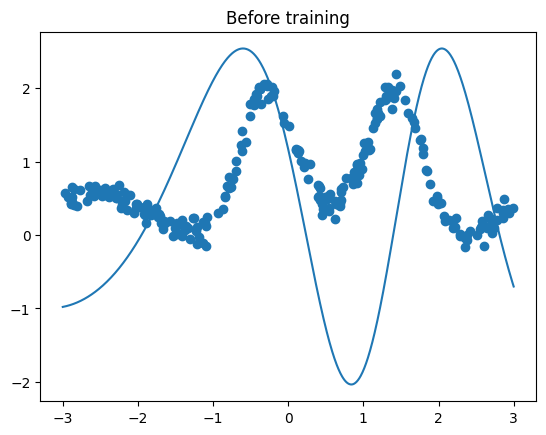
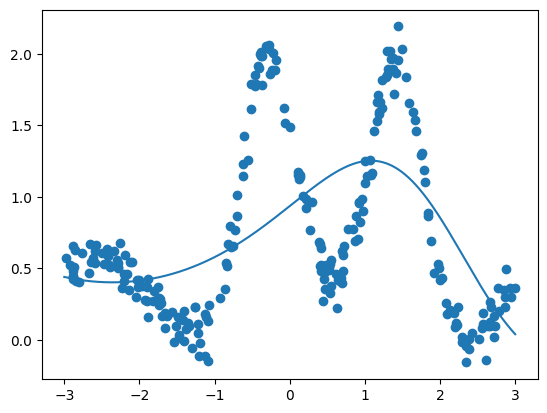
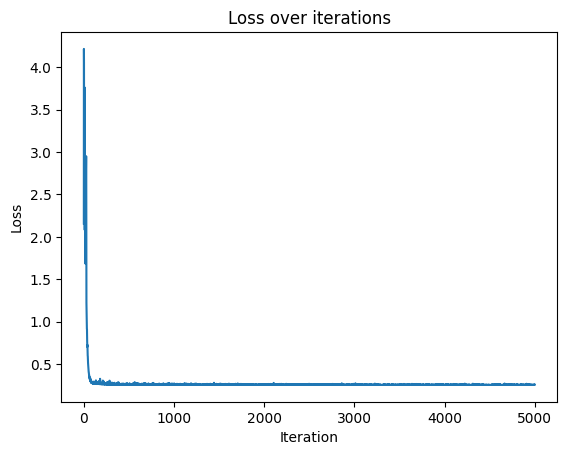

# Problem 2 - Implementing a deep network
Okay, so in the previous problem we implemented a scalar network but with a pretty bad software abstraction. Unless you figured out a nice abstraction, you probably had to laboriously write out the forward and backward pass for each layer in a fairly large chunk of code.
Now, we're going to implement a deeper network where you can't get away with hardcoding the layers. Implement a deep network with 3 layers, each with a hidden size of 32. Use the same nonlinearity in each layer. The correct software abstraction for this isn't obvious, so we'll help you with some components. 

Note, what follows is a slightly simplified version of the code in Karpathy's [micrograd project](https://github.com/karpathy/micrograd) so just giving credit where it is due. The code in that project implements something much more general and flexible and you should take a look at it if you're interested in understanding a little bit more deeply. It's only 150 lines of code and I recommend reading it!

The useful abstraction that we'll give you is the following: a `Module` class with `__call__`, `parameters`, and `zero_grad` methods. The `__call__` method should take in an input and return the output but most importantly, it should store all the info that we are going to need to compute the gradient when we do the backward pass. The `parameters` method should return a list of tensors that are part of the network. The `zero_grad` method should zero out the gradient for each parameter. Every Module will also have a `backward` method that will compute the gradients of the input. Note that this backward method will take in a `grad` argument which will represent the gradient coming from the previous layer in the backwards chain.


In [ ]:
class MeanSquaredLoss():
    def __init__(self):
        self.loss_val = 0
    def __call__(self, y_pred, y_true):
        # TODO implement this
    def grad(self, y_pred, y_true):
        # TODO implement this
    
class ReLU():
    def __call__(self, x):
        # TODO implement this
    def backward(self, grad):
        # TODO implement this
    def zero_grad(self):
        pass
    def parameters(self):
        return []  # ReLu has no parameters

class Layer():
    def __init__(self, in_features, out_features):
        '''Initializer for the layer'''
        self.in_features = in_features
        self.out_features = out_features
        self.weight = # TODO
        self.bias = # TODO
        self.weight_grad = # TODO
        self.bias_grad = # TODO
        
    def parameters(self):
        '''Return the current parameters and their gradients'''
        return [(self.weight, self.weight_grad), (self.bias, self.bias_grad)]
    
    def __call__(self, x):
        '''Compute the forward pass and store the input for the backward pass'''
        # TODO

    def backward(self, grad):
        '''Compute the gradients and store them in a weight_grad and bias_grad variables. Return the gradients that will be needed for the next layer in the backward pass'''
        # TODO
    
    def zero_grad(self):
        '''Set the gradients to zero'''
        # TODO
        
class Network():
    def __init__(self, layers):
        self.layers = layers
        
    def parameters(self):
        '''Returns a list of list of all the parameters in the network'''
        # TODO
    
    def __call__(self, x):
        '''Returns the final output of the network'''
        # TODO
    
    def backward(self, grad):
        '''Goes backwards through the net and alls the backward function of each layer'''
        # TODO
    
    def zero_grad(self):
        '''Goes backward through the net and calls the zero_grad function of each layer'''
        # TODO
    
# Now the last thing we need is an optimizer. This takes in the daa
# passes it through the network, computes the loss, and then
# actually updates the gradients

class SGDOptimizer():
    def __init__(self, network, loss_fn, learning_rate):
        self.network = network
        self.loss_fn = loss_fn
        self.learning_rate = learning_rate
        
    def step(self, x_data, y_data):
        '''Update the parameters of the network and return the loss'''
        # TODO implement this
        
# Now lets try this over the dataset we build before
omega_0 = 1.0
beta_0 = 1.0
omega_1 = 1.0
beta_1 = 1.0
omega_2 = 1.0
beta_2 = 1.0
omega_3 = 1.0
beta_3 = 1.0
data_size = 256
x_data = np.random.uniform(-3, 3, (data_size, 1))
y_data = f(x_data, omega_0, beta_0, omega_1, beta_1, omega_2, beta_2, omega_3, beta_3) + np.random.normal(0, 0.1, (data_size, 1))

# instantiate a network
layer1 = Layer(1, 32)
layer2 = Layer(32, 32)
layer3 = Layer(32, 1)
relu = ReLU()
network = Network([layer1, relu, layer2, relu, layer3])
loss_fn = MeanSquaredLoss()
optimizer = SGDOptimizer(network, loss_fn, 0.001)

# Now lets train the network
losses = []
for i in range(3000):
    loss = optimizer.step(x_data, y_data)
    losses.append(loss)
    if i % 100 == 0:
        print(f'Loss at iteration {i}: {loss}')
        
# Now lets output a prediction
y_pred = network(x_data)
plt.figure()
plt.scatter(x_data, y_pred)
plt.scatter(x_data, y_data)

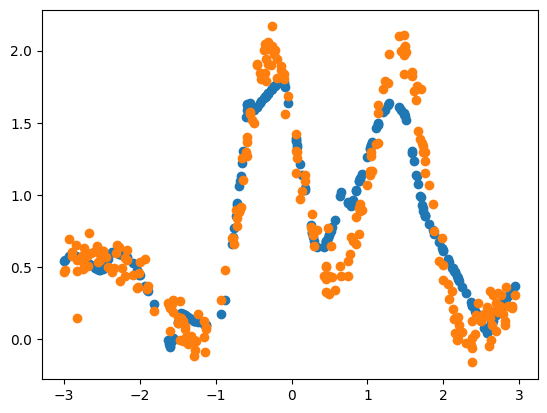

# Problem 2.2 - Changing the activation
Now that you have a working implementation, lets try swapping out the ReLU with a leaky ReLU. This is a version of the ReLU that allows a small gradient when the input is negative. This is the leaky ReLU activation function:
$$\text{leaky\_relu}(x) = \begin{cases}
x, & \text{if }\, x > 0 \\
\alpha x, & \text{otherwise}
\end{cases}$$
where $\alpha$ is a positive hyperparameter that determines how much the function leaks.
Lets try swapping out the activation function and see how it affects the convergence of the network (note, I don't expect this to have a big effect).


In [ ]:
# TODO: Implement the leaky relu, train a model with it, and plot the results below
class LeakyReLU():
    def __init__(self, alpha):
        self.alpha = alpha
    def __call__(self, x):
        # TODO
    def backward(self, grad):
        # TODO
    def zero_grad(self):
        pass
    def parameters(self):
        return []

# Now lets try this with the leaky relu
layer1 = Layer(1, 32)
layer2 = Layer(32, 32)
layer3 = Layer(32, 1)
leaky_relu = LeakyReLU(0.01)
network = Network([layer1, leaky_relu, layer2, leaky_relu, layer3])
loss_fn = MeanSquaredLoss()
optimizer = SGDOptimizer(network, loss_fn, 0.001)

# Now lets train the network
losses = []
for i in range(3000):
    loss = optimizer.step(x_data, y_data)
    losses.append(loss)
    if i % 100 == 0:
        print(f'Loss at iteration {i}: {loss}')
        
# Now lets output a prediction
y_pred = network(x_data)
plt.figure()
plt.scatter(x_data, y_pred)
plt.scatter(x_data, y_data)
    

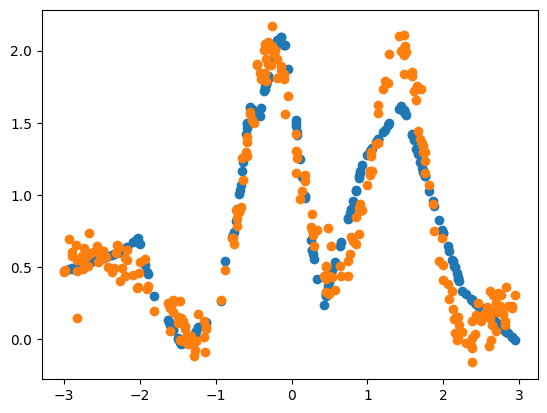

# Problem 2.3 - Changing the optimizer
Now that you have a working implementation, lets try swapping out the optimizer. Try using the Adam optimizer instead of the SGD optimizer. Adam is a more sophisticated optimizer that uses the first and second moments of the gradient to adaptively adjust the learning rate for each parameter. You can find the Adam update rule in the lecture slides.

In [ ]:
# TODO: Implement the Adam optimizer, implement the momentum optimizer
# and compare the results below with an SGD optimizer. You should
# track the losses for each along the way in variables called losses_adam, losses_sgd, losses_momentum.

plt.figure()
plt.plot(losses_adam, label='Adam')
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_momentum, label='Momentum')
# put it on log scale
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over iterations')


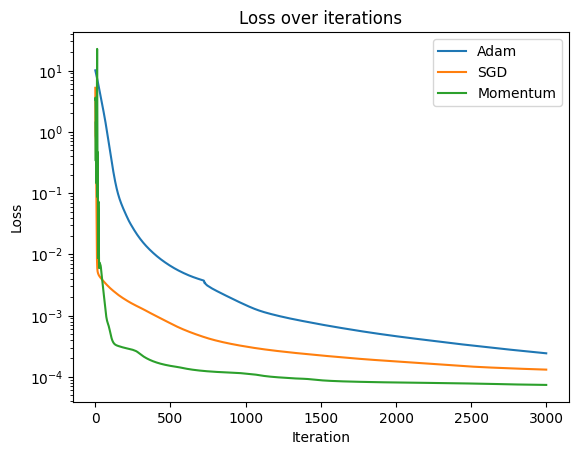

**Warning: your results may not exactly match mine depending on how you implemented things!**

## Problem 2.4 - Changing the initialization
Now that you have a working implementation, lets try swapping out the initialization. Try using the Kaiming initialization, discussed in class, instead of the normal distribution. This initialization sets the variance of the weights to be $2/\text{fan\_in}$ where $\text{fan\_in}$ is the number of incoming connections to a unit. This is a common initialization for ReLU units. You can find the formula for the Kaiming initialization in the lecture slides.

In [ ]:
# TODO: implement the two networks by implementing a layer that has supprt for different weight initialization schemes, plot them and compare the losses
# It is probably easier to just implement one layer but have it take
# in a parameter that determines the initialization scheme



# Plot the losses on a log plot
plt.figure()
plt.plot(losses_kaiming, label='Kaiming')
plt.plot(losses_normal, label='Normal')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over iterations')



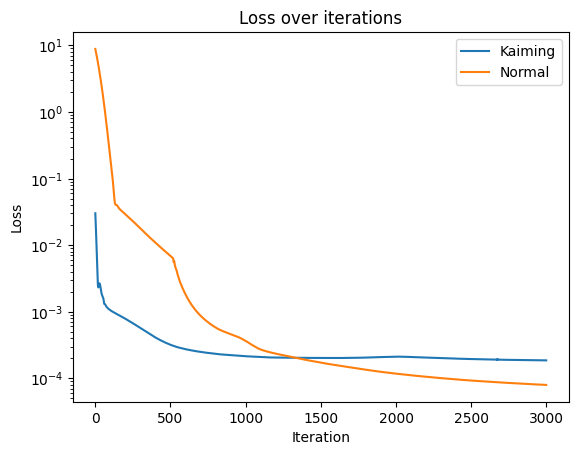

Note that one won't obviously be better than the other and you **will not necessarily get the same results as me based on small implementation details**

## Problem 2.5 - Reimplementing everything with Torch
Now I've made your life difficult by making you implement everything from scratch. I did this for a reason, because this is the fundamental operation that we're doing and it's important to peek under the hood every now and then and see what's going on. But, going forwards, we're mostly going to be focusing on engineering so now it's time to get comfortable with PyTorch. Reimplement the scalar network and the deep network using PyTorch. 

Some useful things:
- [Pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/intro.html)
- [Another pytorch tutorial](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html)

**Desired output: Plot of the loss going down, plot of the predictions**



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

x_tensor = torch.tensor(x_data, dtype=torch.float32)
y_tensor = torch.tensor(y_data, dtype=torch.float32)

# TODO: implement a network, called deep_network
# using pytorch and train it. Run the visualizations
# below. Make sure to store the losses for plotting!
losses = []
            
# Now lets output a prediction and plot the losses
y_pred = deep_network(x_tensor).detach().numpy()
plt.figure()
plt.scatter(x_data, y_pred)
plt.scatter(x_data, y_data)

plt.figure()
plt.plot(losses)

 

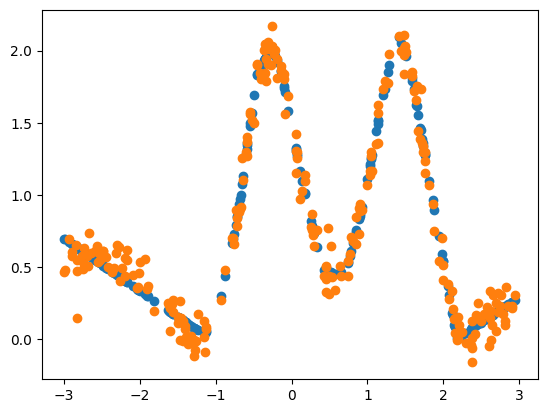
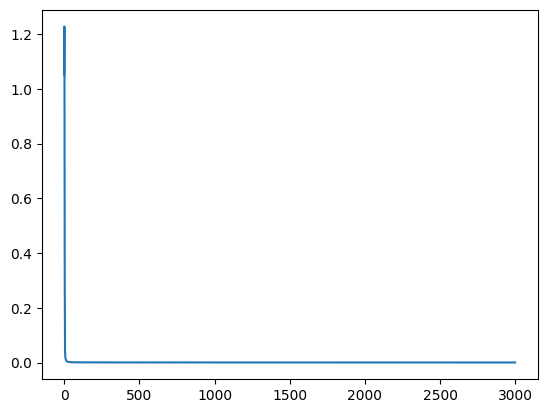

## Problem 3: Lets try a harder problem, one with some generalization challenges
So as we discussed previously, neural networks can fit noise which means sometimes they can struggle to generalize. So lets try some of the regularization methods that we have learned about. We're going to generate a noisy dataset and then split it into a train, validation and test dataset. We're going to try each of the following and see their effect on the test loss:
- L2 regularization
- Dropout
- Ensembling

**Before you do anything, we'll need scikit learn so run**
```bash
pip install scikit-learn
```

Below, we generate some data. There's nothing to do there, just run the cell.

In [ ]:
# Lets make the moon dataset
import torch
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

make_moons_data = make_moons(n_samples=1000, noise=0.0)
# Now plot it
plt.figure()
plt.scatter(make_moons_data[0][:, 0], make_moons_data[0][:, 1], c=make_moons_data[1])
plt.title('Moon dataset')
plt.show()

# However, we actually want to do it with a bunch of noise
make_moons_data = make_moons(n_samples=256, noise=0.3)
# Now plot it
plt.figure()
plt.scatter(make_moons_data[0][:, 0], make_moons_data[0][:, 1], c=make_moons_data[1])
plt.title('Moon dataset')
plt.show()
# Now split it into training, validation, and testing
train_size = 0.7
val_size = 0.15
test_size = 0.15
train_data = make_moons_data[0][:int(train_size * len(make_moons_data[0]))]
train_labels = make_moons_data[1][:int(train_size * len(make_moons_data[0]))]
val_data = make_moons_data[0][int(train_size * len(make_moons_data[0])):int((train_size + val_size) * len(make_moons_data[0]))]
val_labels = make_moons_data[1][int(train_size * len(make_moons_data[0])):int((train_size + val_size) * len(make_moons_data[0]))]
test_data = make_moons_data[0][int((train_size + val_size) * len(make_moons_data[0])):]
test_labels = make_moons_data[1][int((train_size + val_size) * len(make_moons_data[0])):]



## Problem 3.1 - Implement a neural network on this and visualize the train, validation and test loss
Keep in mind that for this problem, you'll need a probability at the end, not a scalar value. So, here we're going to be implementing logistic regression! Instead of just taking the sigmoid like we normally would, there's actually a torch loss that can directly take scalar outputs and applies a sigmoid to it to turn it into a probability. This loss is called the torch.nn.BCEWithLogitsLoss. Documentation for it is [here](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html). Train for long enough that you observe your validation loss actually start to go up. An alternate version is to apply the sigmoid (converting it to a probability) and then use the torch.nn.BCELoss.

A few more comments:
1. Please do not train on the entire dataset. In each optimizer step, take a subset of the data, say 32 points. This will make your training faster. You can implement this manually by shuffling your data, stepping through it in steps of 32, and then reshuffling when you reach the end. Or, you can also use [Torch Dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). Up to you! 
2. Use the ADAM optimizer.
3. For your network, add a function called logit that will take in a dataset and return the logit (i.e. the value before the sigmoid is applied to turn it into a probability). Some of the plotting code relies on this.
4. The losses will fluctuate a lot so I **highly** recommend smoothing them out over the entire epoch.

In [ ]:
from torch import nn
# TODO: Set up and train a neural network on this data
train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.float32)
val_data = torch.tensor(val_data, dtype=torch.float32)
val_labels = torch.tensor(val_labels, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.float32)

def visualize_results(train_losses, val_losses, deep_network):
    '''Helpful visualizer utility
    Args: train_losses: list of training losses
            val_losses: list of validation losses
            deep_network: the trained network
    '''
    # Now lets evaluate the model on the test set
    test_loader = torch.utils.data.DataLoader(list(zip(test_data, test_labels)), batch_size=32, shuffle=False)
    test_losses = []
    deep_network.eval()
    test_loss_total = 0
    total_test_samples = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = deep_network(x_batch)
            loss = loss_fn(y_pred, y_batch.unsqueeze(1))
            test_loss_total += loss.item() * x_batch.size(0)
            total_test_samples += x_batch.size(0)
    average_test_loss = test_loss_total / total_test_samples
    print(f'Average test loss: {average_test_loss}')

    # Now lets output a prediction and plot the losses
    plt.figure()
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    # plot the test loss as a line
    plt.axhline(average_test_loss, color='r', label='Test')
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()


    # Now lets plot the predictions and visualize the decision boundary
    x_range = np.linspace(-3, 3, 100)
    y_range = np.linspace(-3, 3, 100)
    x_mesh, y_mesh = np.meshgrid(x_range, y_range)
    xy_pairs = np.stack([x_mesh, y_mesh], axis=-1).reshape(-1, 2)
    xy_tensor = torch.tensor(xy_pairs, dtype=torch.float32)
    deep_network.eval()
    with torch.no_grad():
        predictions = deep_network(xy_tensor).numpy().reshape(100, 100)
    plt.figure()
    plt.contourf(x_mesh, y_mesh, predictions, levels=0)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels)
    plt.title('Decision boundary')


# TODO: Implement the network and train it. Make sure to track
# the train and value losses along the way and store them in train_losses and val_losses
    
visualize_results(train_losses, val_losses, deep_network)


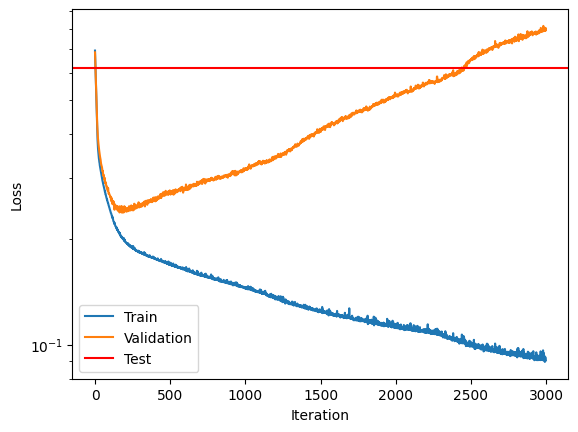
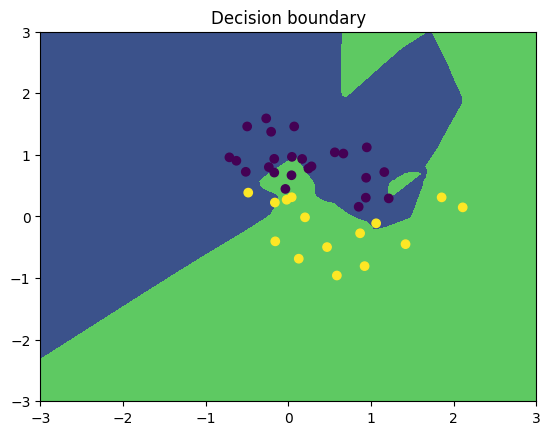

## Problem 3.2 - Implement L2 regularization
Implement L2 regularization. This is done by adding a term to the loss that is proportional to the sum of the squares of the weights. This is a common form of regularization that encourages the weights to be small. The strength of the regularization is controlled by a hyperparameter $\lambda$. Implement this and see how it affects the test loss. Reuse the previous network from the previous problem and try a couple of different regularization parameters to see their effect. Try it with three different values of $\lambda$ and see if you can get the validation loss closer to the training loss. 

However, I will tell you a useful fact. The Adam optimizer has a weight_decay argument that implements L2 regularization. You're welcome to use it. The other way to implement weight decay is to note that the model has a parameters() method that returns a list of all the parameters in the model. You can then loop over these parameters and add the sum of the squares of the weights to the loss.

So, as an example for a hypothetical model called deep_model, you could do something like this:
```python
for param in deep_model.parameters():
    do something with the parameters
```

In [ ]:
# TODO: implement a network with L2 regularization and visualize the predictions
# Use this to visualize the results. Make sure to track
# the train and value losses along the way.
visualize_results(train_losses, val_losses, deep_network)

## Problem 3.3 - Use dropout
Use dropout in your network. This is a form of regularization that randomly sets a fraction of the activations to zero. This can be implemented in PyTorch using the torch.nn.Dropout layer. This layer takes in a single argument, which is the probability that a neuron is set to zero. Note that this is a function, so you apply it to an input or a hidden layer in the forward method so you'll have to modify the network you have.

**Important warning**: While you use dropout during training, you may not want to use it at test-time. Dropout is intended as a training-time regularization, but there's not an obvious reason to apply it after you're done training. So, you'll want to turn off dropout during test-time. You can do this by calling `model.eval()` on your model. This will set the model to evaluation mode and turn off dropout. You can then call `model.train()` to turn dropout back on.

In [ ]:
# TODO: Implement a network with dropout in the layers and visualize the predictions. Make sure to track the train and value losses along the way.

# Use this to visualize the results
visualize_results(train_losses, val_losses, deep_network)

## Problem 3.4 - Ensembling
This is really one of the most powerful tools in the toolbox and is pretty much always going to give you an improvement (although it comes at a serious price of having to train and keep around multiple models!) The idea is that you train multiple models on the same dataset and then average their predictions. There's a couple of ways you could do this:
1. You could train multiple models on the same dataset and then average their predictions. This is the simplest way to do it.
2. You could train multiple models on different slices of the train dataset. 

**Watch out**: each model will need its own optimizer

In the end, you'll want to write a class that takes in a list of models and then averages their predictions (note, you can average their logits or average their actual class predictions. Unclear which is best.). This class should have a `forward` method that takes in an input and returns the mode of the model predictions.

In [ ]:
num_models = 5
# TODO implement an ensemble network and visualize the predictions. Make sure to track the train and value losses along the way.
# Use this to visualize the results
visualize_results(train_losses, val_losses, final_network)